In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fftpack import fft
import numpy as np
import seaborn as sns
import csv

# Đường dẫn đến tệp dữ liệu
original_file_path = 'crude_oil_imports.csv'
selected_file_path = 'selected_crude_oil_imports.csv'

In [8]:
### Block 1: Tiền xử lý dữ liệu và lưu file CSV đã chọn
def preprocess_and_save_data(file_path, output_file):
    """
    Lựa chọn các cột cần thiết và lưu vào file CSV mới.
    """
    data = pd.read_csv(file_path)
    selected_columns = data[['Period', 'Quantity', 'Origin Country', 'Grade Name']]
    selected_columns['Period'] = pd.to_datetime(selected_columns['Period'], errors='coerce')
    selected_columns.to_csv(output_file, index=False)
    print("Dữ liệu đã được lưu vào tệp:", output_file)

preprocess_and_save_data(original_file_path, selected_file_path)

Dữ liệu đã được lưu vào tệp: selected_crude_oil_imports.csv


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15392\752164045.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Period'] = pd.to_datetime(selected_columns['Period'], errors='coerce')


In [9]:
### Block 2: Hàm tải và xử lý dữ liệu
def load_and_process_data(file_path):
    """
    Đọc dữ liệu đã chọn từ file CSV, xử lý dữ liệu và trả về dữ liệu tổng hợp theo tháng.
    """
    data = pd.read_csv(file_path)
    data['Period'] = pd.to_datetime(data['Period'], errors='coerce')
    monthly_data = data.groupby(data['Period'].dt.to_period('M'))['Quantity'].sum()
    monthly_data.index = monthly_data.index.to_timestamp()
    return monthly_data, data

# Sử dụng hàm để lấy dữ liệu đã xử lý
monthly_data, data = load_and_process_data(selected_file_path)

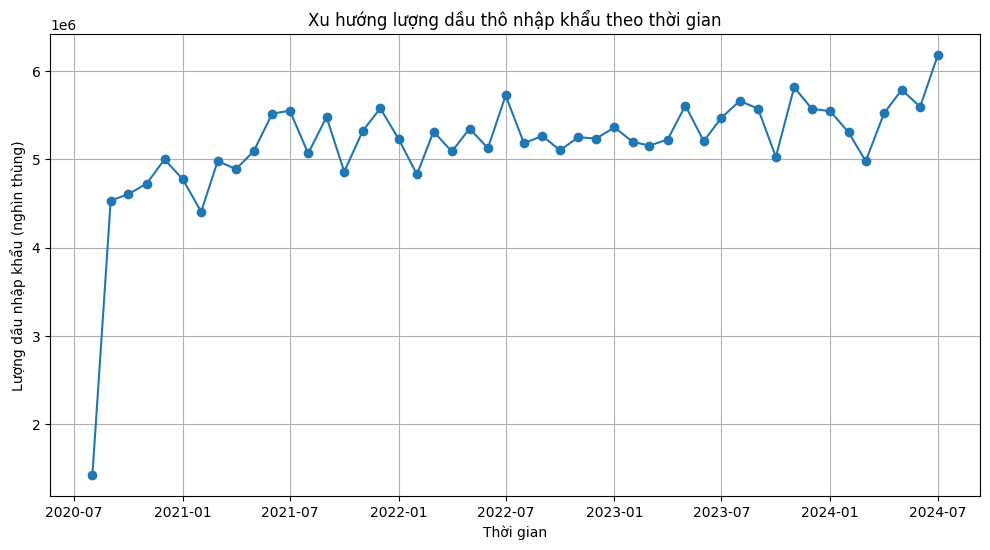

In [10]:
### Block 3: Vẽ biểu đồ xu hướng (Trend)
def plot_trend(data):
    """
    Vẽ biểu đồ xu hướng của lượng dầu thô nhập khẩu theo thời gian.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, marker='o', linestyle='-')
    plt.title("Xu hướng lượng dầu thô nhập khẩu theo thời gian")
    plt.xlabel("Thời gian")
    plt.ylabel("Lượng dầu nhập khẩu (nghìn thùng)")
    plt.grid(True)
    plt.show()

plot_trend(monthly_data)

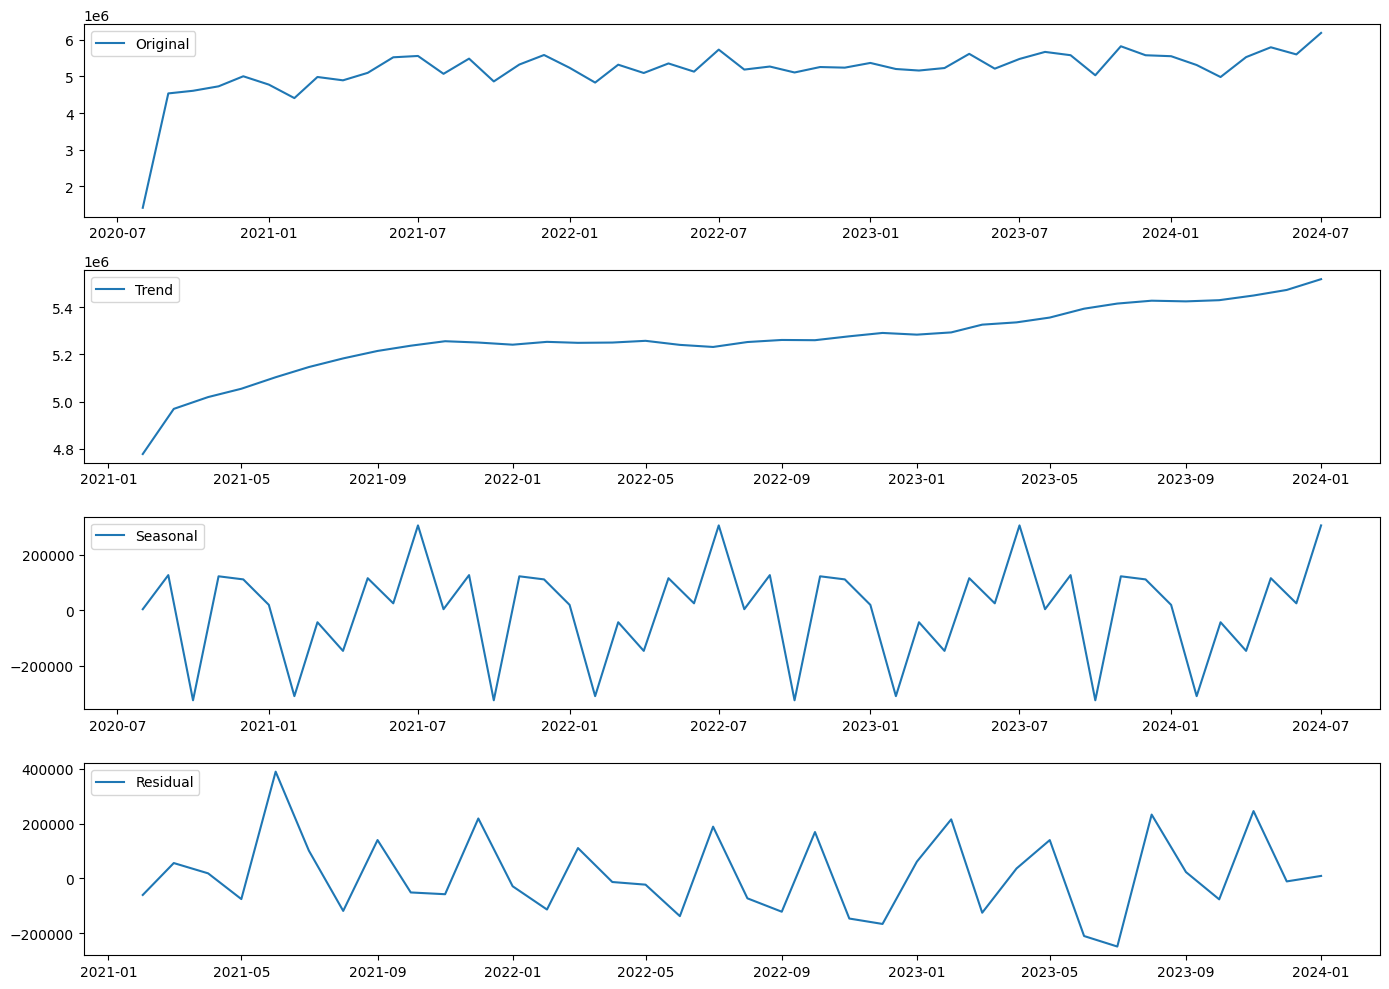

In [11]:
### Block 4: Phân tích mùa vụ (Seasonal Decomposition)
def plot_seasonal_decomposition(data):
    """
    Phân tích và hiển thị các thành phần xu hướng, mùa vụ, và nhiễu của dữ liệu.
    """
    decomposition = seasonal_decompose(data, model='additive', period=12)
    plt.figure(figsize=(14, 10))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

plot_seasonal_decomposition(monthly_data)

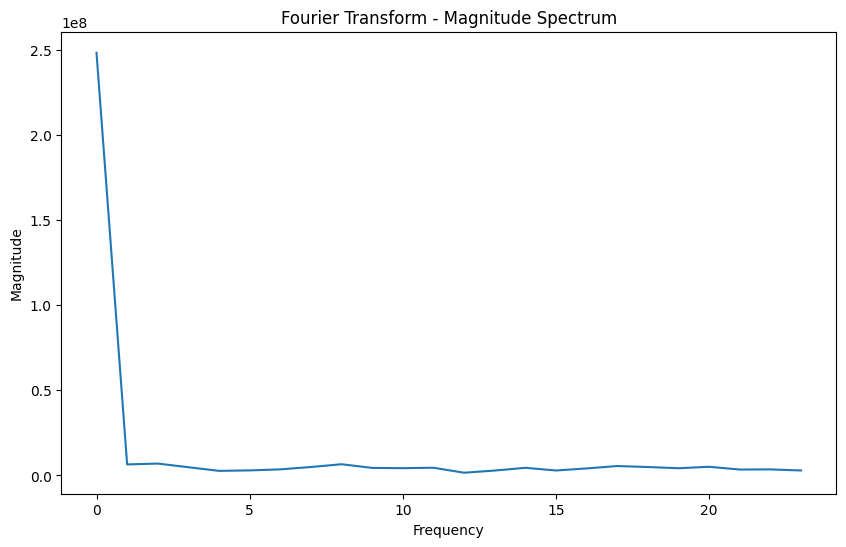

In [12]:
### Block 5: Phân tích chu kỳ (Cycle Analysis) với Fourier Transform
def plot_fourier_transform(data):
    """
    Phân tích chu kỳ bằng Fourier Transform và hiển thị phổ tần số.
    """
    quantity_values = data.values
    fft_result = fft(quantity_values)
    magnitude = np.abs(fft_result)
    plt.figure(figsize=(10, 6))
    plt.plot(magnitude[:len(magnitude)//2])
    plt.title("Fourier Transform - Magnitude Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

plot_fourier_transform(monthly_data)

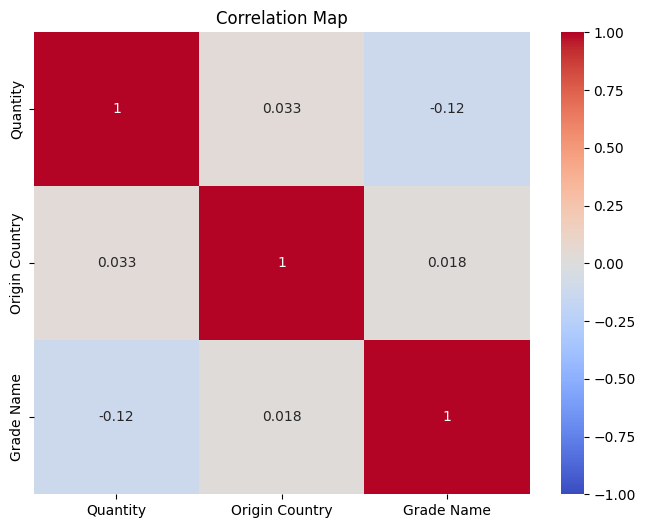

In [13]:
### Block 6: Bản đồ tương quan (Correlation Map)
def plot_correlation_map(data):
    """
    Tạo bản đồ tương quan giữa các biến trong dữ liệu.
    """
    data_encoded = data.copy()
    data_encoded['Origin Country'] = data_encoded['Origin Country'].astype('category').cat.codes
    data_encoded['Grade Name'] = data_encoded['Grade Name'].astype('category').cat.codes
    correlation_matrix = data_encoded[['Quantity', 'Origin Country', 'Grade Name']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Map")
    plt.show()

plot_correlation_map(data)